Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 344 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 115s 10s/step - accuracy: 0.6323 - loss: 0.6282 - val_accuracy: 0.7024 - val_loss: 0.4578
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 33s 370ms/step - accuracy: 0.6957 - loss: 0.4893 - val_accuracy: 0.9167 - val_loss: 0.2885
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - accuracy: 0.8464 - loss: 0.3698 - val_accuracy: 0.9643 - val_loss: 0.2112
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step - accuracy: 0.8950 - loss: 0.3139 - val_accuracy: 0.9524 - val_loss: 0.1603
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 288ms/step - accuracy: 0.9156 - loss: 0.2491 - val_accuracy: 0.9524 - val_loss: 0.1446
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 407ms/step - accuracy: 0.9223 - loss: 0.2128 - val_accuracy: 0.9881 - val_loss: 0.1112
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - accuracy: 0.9568 - loss: 0.1862 - val_accuracy: 0.9881 - val_loss: 0.0990
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.9531 - loss: 0.1441 - val_accuracy: 0

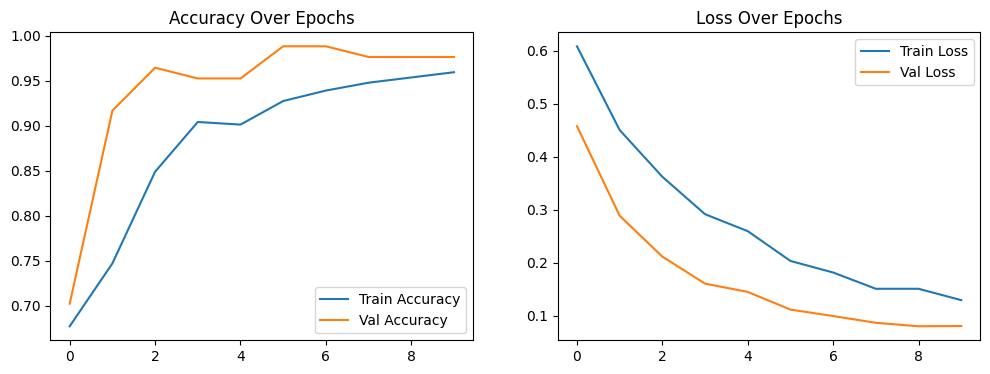

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Mount Google Drive (if dataset is stored there)
from google.colab import drive
drive.mount('/content/drive')

# Set dataset path (update this path accordingly)
dataset_path = "/content/drive/MyDrive/ICBT Dataset"

# Image parameters
img_height, img_width = 224, 224
batch_size = 32

# Data Augmentation and Loading
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # Splitting 20% for validation
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

# Save Model
model.save("prescription_cnn_model.h5")

# Plot Training Results
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.show()
